In [2]:
from SVM import SVM
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import logging
logging.basicConfig(level=logging.WARN)

/Users/tom/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


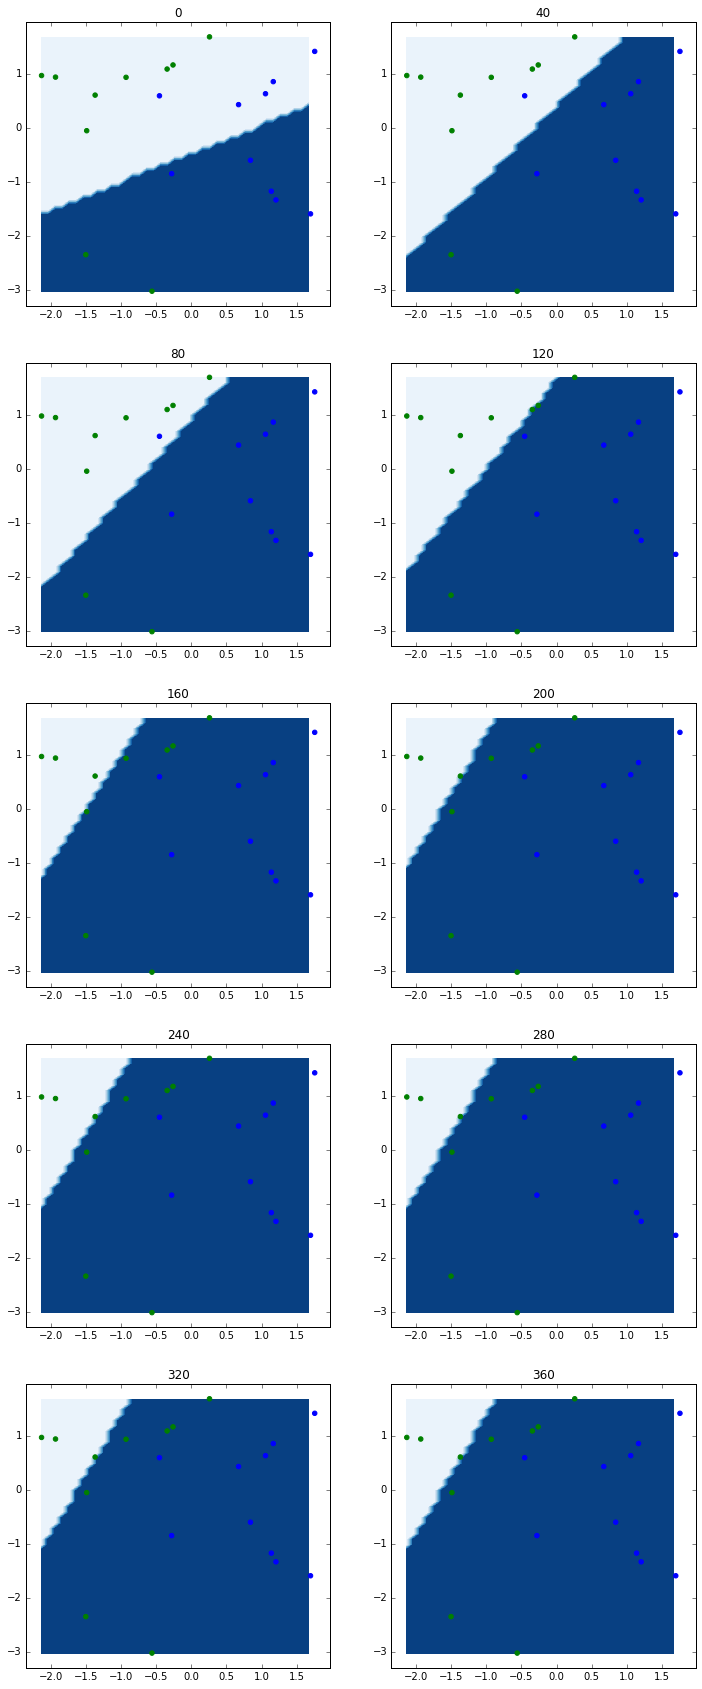

In [24]:
svm = SVM()

data, labels = make_classification(20, 2, 2, 0)
colors = ['blue' if x else 'green' for x in labels]

def eval_model(data, labels, model):
    return sum([model.predict(*d) == l for d, l in zip(data, labels)]) * 100. / len(labels)

nplots = 10
niter = 400
plot_freq = niter // nplots

fsize = 6
fig = plt.figure(figsize=(fsize * 2, fsize*nplots))
pn = 1
for i in range(niter):
    for d, l in zip(data, labels):

        logging.info("f(x, y) = %fx + %fy + %f" % (svm.a.value, svm.b.value, svm.c.value))
        svm.train(*d, l)
    if i % plot_freq == 0:
        ax = fig.add_subplot(nplots, 2, pn)
        pn += 1
        #print(eval_model(data, labels, svm), i)
        #print("  f(x, y) = %fx + %fy + %f" % (svm.a.value, svm.b.value, svm.c.value))

        x_min, y_min = data.min(0)
        x_max, y_max = data.max(0)
        h = 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = np.array([svm.predict(x, y) for x, y in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap='Blues')

        ax.scatter(*data.T, color=colors)
        ax.set_title("%d" % i)
fig.show()
